### 필요한 모듈을 가져오고 데이터를 로드하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
sns.set_theme(color_codes=True)

In [2]:
# 예측할 종목은 삼성전자, SK하이닉스, 네이버, LG화학, 삼성바이오로직스, 삼성SDI, 현대차, 카카오, 센트리온, 기아, 한양증권입니다
# 기간은 2020.02.01 ~ 2021.02.01 입니다

directory = 'C:/Jupyter_Project/'
ori_name = ['SE.csv', 'SKH.csv', 'NAV.csv', 'LGC.csv', 'SAMB.csv',
          'SSDI.csv', 'HD.csv', 'KAKA.csv', 'CETR.csv', 'KIA.csv', 'HS.csv']
stocks = [directory + s for s in ori_name]
stocks

['C:/Jupyter_Project/SE.csv',
 'C:/Jupyter_Project/SKH.csv',
 'C:/Jupyter_Project/NAV.csv',
 'C:/Jupyter_Project/LGC.csv',
 'C:/Jupyter_Project/SAMB.csv',
 'C:/Jupyter_Project/SSDI.csv',
 'C:/Jupyter_Project/HD.csv',
 'C:/Jupyter_Project/KAKA.csv',
 'C:/Jupyter_Project/CETR.csv',
 'C:/Jupyter_Project/KIA.csv',
 'C:/Jupyter_Project/HS.csv']

In [3]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,57200,94000,180000,343500,495000,287000,127500,162000,163725.48438,41950,9370
1,56400,93500,179500,337500,484500,276000,125000,159000,161764.70313,40900,9570
2,57200,94700,177500,350000,479500,284000,123500,159500,163235.29688,40100,9140
3,58900,97100,180500,379500,492500,308000,124000,164500,164215.68750,40250,9110
4,59500,97700,181500,382000,490000,314000,124000,163000,161274.51563,39400,9040


### 수익률의 평균과 표준편차를 구하기

In [5]:
# 수익률의 평균과 표준편차를 구해줍니다

returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [6]:
mean_daily_returns

Close_x    0.001718
Close_y    0.001490
Close_x    0.002973
Close_y    0.004735
Close_x    0.002417
Close_y    0.004421
Close_x    0.003101
Close_y    0.004357
Close_x    0.003933
Close_y    0.003639
Close      0.000330
dtype: float64

In [7]:
volatilities

Close_x    0.021490
Close_y    0.026613
Close_x    0.025964
Close_y    0.036463
Close_x    0.029861
Close_y    0.034789
Close_x    0.034940
Close_y    0.026281
Close_x    0.036751
Close_y    0.034354
Close      0.025353
dtype: float64

In [8]:
# returns와 volatility에 대한 DataFrame을 만듭니다

combine = pd.DataFrame({'returns': mean_daily_returns,
                       'volatility': volatilities})

In [9]:
print(combine)

          returns  volatility
Close_x  0.001718    0.021490
Close_y  0.001490    0.026613
Close_x  0.002973    0.025964
Close_y  0.004735    0.036463
Close_x  0.002417    0.029861
Close_y  0.004421    0.034789
Close_x  0.003101    0.034940
Close_y  0.004357    0.026281
Close_x  0.003933    0.036751
Close_y  0.003639    0.034354
Close    0.000330    0.025353


### 시각화하기
> 무차별 곡선 위에 위치한 종목을 매수하고 아래에 있는 종목을 매도해야 합니다. 예를 들면 Naver와 SAMB 중에서 고민한다면 NAVER를 사야합니다. 아래 그래프 상에서는 KAKAO에 투자하는 것이 가장 유리합니다. 한양증권에 투자하는 행동은 그래프 상에 존재하는 어떤 투자보다도 열등합니다

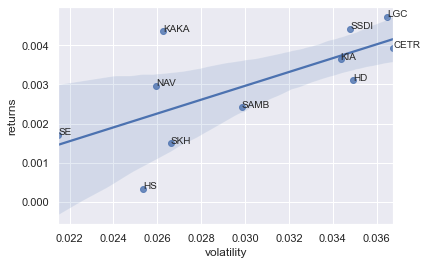

In [10]:
# seaborn 라이브러리의 regplot을 이용해서 산포도와 선형회귀곡선을 함께 그립니다
# volatility는 Risk, return은 Expected return을 의미합니다

g = sns.regplot(x="volatility", y="returns", data=combine)

for i in range(combine.shape[0]):
    y, x = combine.iloc[i]
    plt.text(x,y,ori_name[i].replace('.csv',''))